# Introduction:

![audi cars](https://www.reuters.com/resizer/v2/https%3A%2F%2Fcloudfront-us-east-2.images.arcpublishing.com%2Freuters%2FT6U3GCWM5NI7XJX3KJXN5KZ52M.jpg?auth=edb16d79b0b72a79e90158c038417fc3c0d5c7c01e73f05ccb18e17211ec0f87&width=960&quality=80)

In this analysis, I performed a basic exploratory data analysis (EDA) of the features and selected the top k features using the K-Best method for both linear and polynomial features. I then applied regression models to evaluate 10 algorithms, optimizing for the best metrics to identify the most effective models.



Importing the packages needed for the analysis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr, spearmanr
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max.columns', None)

# Importing dataset and exploration

We will import the file that is with audi naming on it.

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/used-car-dataset-ford-and-mercedes/cclass.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/unclean cclass.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/focus.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/audi.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/toyota.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/skoda.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/ford.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/vauxhall.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/bmw.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/vw.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/hyundi.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/unclean focus.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/merc.csv


In [3]:
data_audi = pd.read_csv("/kaggle/input/used-car-dataset-ford-and-mercedes/audi.csv")
print(data_audi.shape)
data_audi.head()

(10668, 9)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


Seeing if there are any missing values in the records

In [4]:
data_audi.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

Nice :) it is a nice and clean data, very good one to work with!

In [5]:
data_audi.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


# Exploratory data analysis

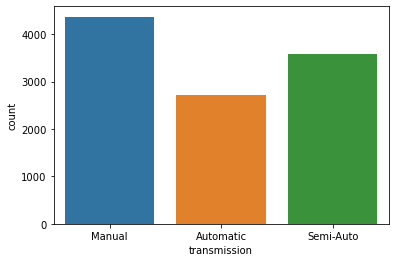

In [6]:
sns.countplot(data_audi["transmission"])

Most of the cars on the dataset are with manual transmission then cars in seim automatic and automatic transmission

 A3     0.180821
 Q3     0.132827
 A4     0.129453
 A1     0.126265
 A5     0.082677
 Q5     0.082208
 Q2     0.077053
 A6     0.070116
 Q7     0.037214
 TT     0.031496
 A7     0.011436
 A8     0.011061
 Q8     0.006468
 RS6    0.003656
 RS3    0.003093
 RS4    0.002906
 RS5    0.002718
 R8     0.002625
 S3     0.001687
 SQ5    0.001500
 S4     0.001125
 SQ7    0.000750
 S8     0.000375
 S5     0.000281
 A2     0.000094
 RS7    0.000094
Name: model, dtype: float64


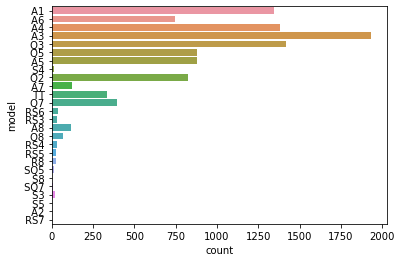

In [7]:
print(data_audi["model"].value_counts() / len(data_audi))
sns.countplot(y = data_audi["model"])

Top 3 cars are A3, Q3 and A4

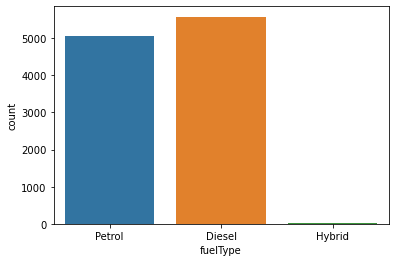

In [8]:
sns.countplot(data_audi["fuelType"])

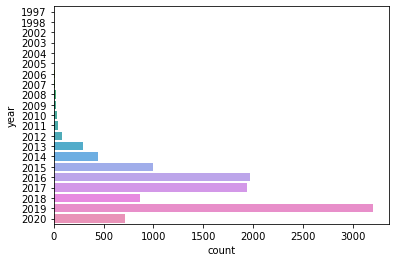

In [9]:
sns.countplot(y = data_audi["year"])

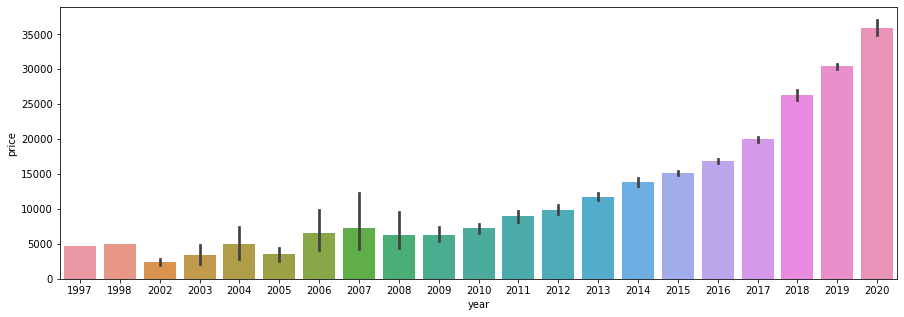

In [10]:
plt.figure(figsize=(15,5),facecolor='w') 
sns.barplot(x = data_audi["year"], y = data_audi["price"])

The recently manufactured cars are sold for more average price when compared to the cars that are manufactured earlier.

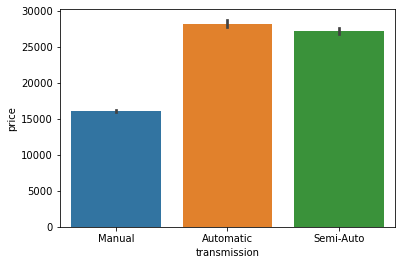

In [11]:
sns.barplot(x = data_audi["transmission"], y = data_audi["price"])

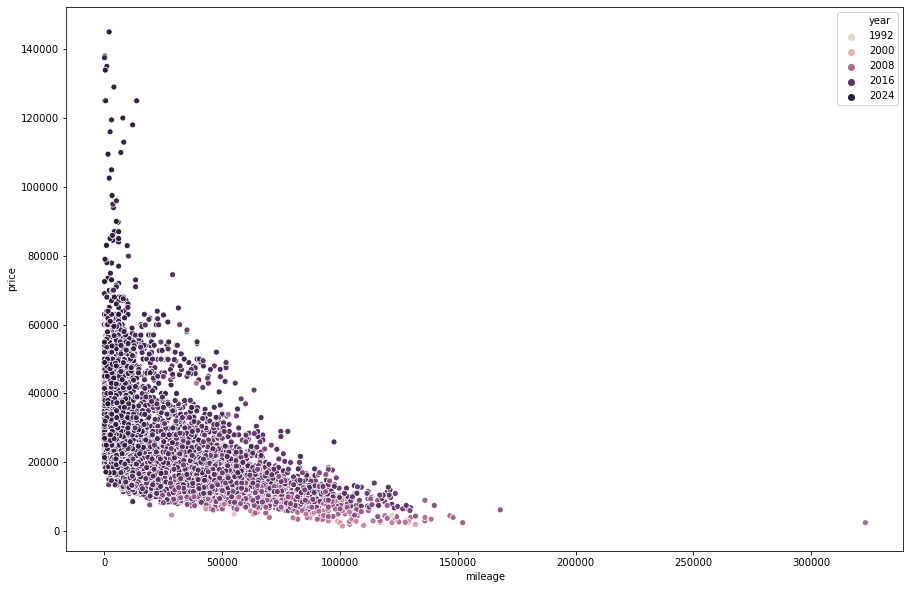

In [12]:
plt.figure(figsize=(15,10),facecolor='w') 
sns.scatterplot(x=data_audi["mileage"], y=data_audi["price"], hue = data_audi["year"])

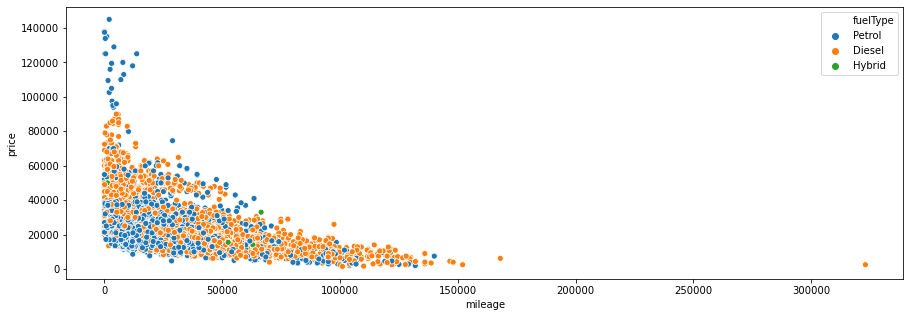

In [13]:
plt.figure(figsize=(15,5),facecolor='w') 
sns.scatterplot(x=data_audi["mileage"], y=data_audi["price"], hue = data_audi["fuelType"])

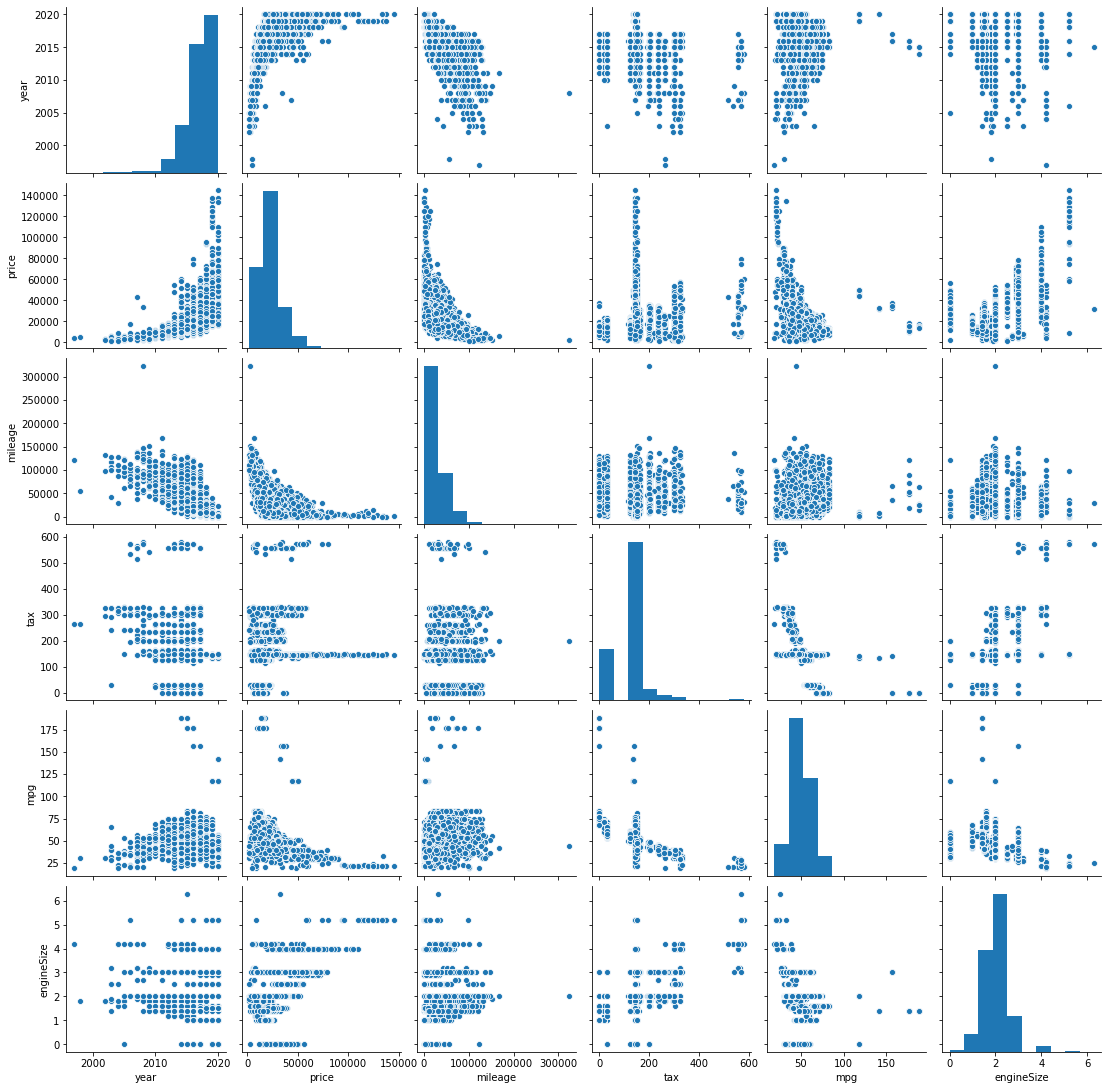

In [14]:
sns.pairplot(data_audi)

Now I am computing a age field, subtracting 2020 from the year field and dropping the year field

In [15]:
data_audi["age_of_car"] = 2020 - data_audi["year"]
data_audi = data_audi.drop(columns = ["year"])
data_audi.sample(10)

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,age_of_car
1624,A1,11200,Manual,29819,Petrol,0,67.3,1.0,4
4484,A5,22990,Semi-Auto,28500,Diesel,145,65.7,2.0,3
6710,Q3,23000,Semi-Auto,15412,Petrol,150,47.9,1.4,2
6781,A3,19490,Semi-Auto,30319,Petrol,145,56.5,1.5,2
1145,Q3,33491,Semi-Auto,4444,Petrol,145,39.2,1.5,0
6556,A4,17600,Manual,25974,Petrol,145,51.4,1.4,3
4600,Q2,22692,Semi-Auto,39000,Diesel,145,58.9,2.0,3
5195,A1,21490,Semi-Auto,11310,Petrol,150,47.1,1.0,1
2785,A1,9980,Manual,30394,Petrol,0,67.3,1.0,4
4078,A4,32850,Semi-Auto,3500,Petrol,145,38.2,2.0,0


# Pre-processing for modeling

I like to use pd.get_dummies option over OHE in SKLearn to get the one hot encoded variables for the categorical variables. It is usually tidy on the dataset and the column names are preserved.

In [16]:
data_audi_expanded = pd.get_dummies(data_audi)
data_audi_expanded.head()

,price,mileage,tax,mpg,engineSize,age_of_car,model_ A1,model_ A2,model_ A3,model_ A4,model_ A5,model_ A6,model_ A7,model_ A8,model_ Q2,model_ Q3,model_ Q5,model_ Q7,model_ Q8,model_ R8,model_ RS3,model_ RS4,model_ RS5,model_ RS6,model_ RS7,model_ S3,model_ S4,model_ S5,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
0,12500,15735,150,55.4,1.4,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,16500,36203,20,64.2,2.0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,11000,29946,30,55.4,1.4,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,16800,25952,145,67.3,2.0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,17300,1998,145,49.6,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


Applying the standard scalar option to standardize all the variables in the dataset.

In [17]:
std = StandardScaler()
data_audi_expanded_std = std.fit_transform(data_audi_expanded)
data_audi_expanded_std = pd.DataFrame(data_audi_expanded_std, columns = data_audi_expanded.columns)
print(data_audi_expanded_std.shape)
data_audi_expanded_std.head()

(10668, 38)


,price,mileage,tax,mpg,engineSize,age_of_car,model_ A1,model_ A2,model_ A3,model_ A4,model_ A5,model_ A6,model_ A7,model_ A8,model_ Q2,model_ Q3,model_ Q5,model_ Q7,model_ Q8,model_ R8,model_ RS3,model_ RS4,model_ RS5,model_ RS6,model_ RS7,model_ S3,model_ S4,model_ S5,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
0,-0.887521,-0.386836,0.357147,0.357550,-0.880218,0.046450,2.630555,-0.009682,-0.469824,-0.385620,-0.300215,-0.274596,-0.107556,-0.105758,-0.288939,-0.391373,-0.299286,-0.196602,-0.080685,-0.051299,-0.055704,-0.053985,-0.052209,-0.060574,-0.009682,-0.041111,-0.033558,-0.016772,-0.019367,-0.038756,-0.027395,-0.180334,-0.583268,1.200728,-0.712333,-1.046643,-0.051299,1.052165
1,-0.546058,0.483989,-1.578323,1.037130,0.114925,0.507834,-0.380148,-0.009682,-0.469824,-0.385620,-0.300215,3.641707,-0.107556,-0.105758,-0.288939,-0.391373,-0.299286,-0.196602,-0.080685,-0.051299,-0.055704,-0.053985,-0.052209,-0.060574,-0.009682,-0.041111,-0.033558,-0.016772,-0.019367,-0.038756,-0.027395,-0.180334,1.714479,-0.832828,-0.712333,0.955435,-0.051299,-0.950421
2,-1.015570,0.217781,-1.429440,0.357550,-0.880218,0.507834,2.630555,-0.009682,-0.469824,-0.385620,-0.300215,-0.274596,-0.107556,-0.105758,-0.288939,-0.391373,-0.299286,-0.196602,-0.080685,-0.051299,-0.055704,-0.053985,-0.052209,-0.060574,-0.009682,-0.041111,-0.033558,-0.016772,-0.019367,-0.038756,-0.027395,-0.180334,-0.583268,1.200728,-0.712333,-1.046643,-0.051299,1.052165
3,-0.520448,0.047853,0.282706,1.276528,0.114925,0.046450,-0.380148,-0.009682,-0.469824,2.593229,-0.300215,-0.274596,-0.107556,-0.105758,-0.288939,-0.391373,-0.299286,-0.196602,-0.080685,-0.051299,-0.055704,-0.053985,-0.052209,-0.060574,-0.009682,-0.041111,-0.033558,-0.016772,-0.019367,-0.038756,-0.027395,-0.180334,1.714479,-0.832828,-0.712333,0.955435,-0.051299,-0.950421
4,-0.477766,-0.971285,0.282706,-0.090355,-1.543647,-0.876318,-0.380148,-0.009682,2.128456,-0.385620,-0.300215,-0.274596,-0.107556,-0.105758,-0.288939,-0.391373,-0.299286,-0.196602,-0.080685,-0.051299,-0.055704,-0.053985,-0.052209,-0.060574,-0.009682,-0.041111,-0.033558,-0.016772,-0.019367,-0.038756,-0.027395,-0.180334,-0.583268,1.200728,-0.712333,-1.046643,-0.051299,1.052165


In [18]:
X_train, X_test, y_train, y_test = train_test_split(data_audi_expanded_std.drop(columns = ['price']), data_audi_expanded_std[['price']])
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8001, 37)
(2667, 37)
(8001, 1)
(2667, 1)


# Modeling

## Selecting best features for model

Since ther are 37 variables in the dataset after the one hot encoding, I am using SelectKBest option from sklearn to select the best features from the dataset for applying the regression.

For this, I am executing the SelectKBest() on f_regression by taking into consideration from 3 variables to 37 variables to see where we get the best score. 



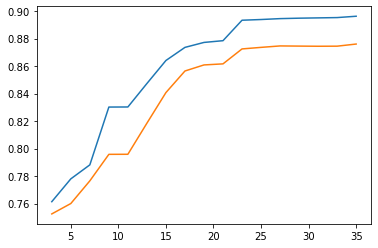

In [19]:
column_names = data_audi_expanded.drop(columns = ['price']).columns

no_of_features = []
r_squared_train = []
r_squared_test = []

for k in range(3, 37, 2):
    selector = SelectKBest(f_regression, k = k)
    X_train_transformed = selector.fit_transform(X_train, y_train)
    X_test_transformed = selector.transform(X_test)
    regressor = LinearRegression()
    regressor.fit(X_train_transformed, y_train)
    no_of_features.append(k)
    r_squared_train.append(regressor.score(X_train_transformed, y_train))
    r_squared_test.append(regressor.score(X_test_transformed, y_test))
    
sns.lineplot(x = no_of_features, y = r_squared_train, legend = 'full')
sns.lineplot(x = no_of_features, y = r_squared_test, legend = 'full')

We get score of 0.89 around 25 variables befor the curve stablizes.

In [20]:
models_to_evaluate = [
    ("Linear Regression", LinearRegression()),
     ("Ridge Regression", Ridge(alpha=1.0)),
    ("Lasso Regression", Lasso(alpha=0.1)),
     ("ElasticNet", ElasticNet(alpha=0.1, l1_ratio=0.5)),
    ("Decision Tree", DecisionTreeRegressor(max_depth=5)),
    ("Random Forest", RandomForestRegressor(n_estimators=100, random_state=42)),
    ("Gradient Boosting", GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
    ("Support Vector Regressor", SVR(kernel='rbf', C=1.0, epsilon=0.1)),
    ("K-Nearest Neighbors", KNeighborsRegressor(n_neighbors=5))
 
]
results = []

for name, model in models_to_evaluate:
    
    model.fit(X_train_transformed, y_train)
    
    # Predictions
    y_pred_train = model.predict(X_train_transformed)
    y_pred_test = model.predict(X_test_transformed)
    
    # Metrics
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    
    # Pearson and Spearman Correlation (only on test set)
    #pearson_corr, _ = pearsonr(y_test, y_pred_test)
    spearman_corr, _ = spearmanr(y_test, y_pred_test)
    
    # Store results
    results.append({
        "Model": name,
        "MSE (Train)": mse_train,
        "MSE (Test)": mse_test,
        "RMSE (Train)": rmse_train,
        "RMSE (Test)": rmse_test,
        "R² (Train)": r2_train*100,
        "R² (Test)": r2_test*100,
        #"Pearson Correlation": pearson_corr*100,
        "Spearman Correlation": spearman_corr*100
    })
    

In [21]:
results_df = pd.DataFrame(results)

In [22]:
results_df

,Model,MSE (Train),MSE (Test),RMSE (Train),RMSE (Test),R² (Train),R² (Test),Spearman Correlation
0,Linear Regression,0.103518,0.125007,0.321742,0.353563,89.620171,87.599755,95.211134
1,Ridge Regression,0.103518,0.125011,0.321742,0.353568,89.620159,87.599400,95.206460
2,Lasso Regression,0.197548,0.225926,0.444464,0.475316,80.191679,77.588992,92.901719
3,ElasticNet,0.152187,0.183761,0.390112,0.428674,84.740055,81.771565,94.250702
4,Decision Tree,0.141092,0.168922,0.375623,0.411002,85.852564,83.243514,91.395057
5,Random Forest,0.006294,0.052618,0.079336,0.229385,99.368873,94.780525,97.633813
6,Gradient Boosting,0.050730,0.061984,0.225234,0.248966,94.913235,93.851411,96.735518
7,Support Vector Regressor,0.050640,0.074186,0.225033,0.272371,94.922285,92.641032,97.122240
8,K-Nearest Neighbors,0.036408,0.077254,0.190810,0.277946,96.349300,92.336687,97.013817


In [23]:
from sklearn.model_selection import GridSearchCV
models_with_grids = [
    ("Linear Regression", LinearRegression(), {}),
    ("Ridge Regression", Ridge(), {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}),
    ("Lasso Regression", Lasso(), {'alpha': [0.01, 0.1, 1.0, 10.0]}),
    ("ElasticNet", ElasticNet(), {'alpha': [0.01, 0.1, 1.0], 'l1_ratio': [0.1, 0.5, 0.9]}),
    ("Decision Tree", DecisionTreeRegressor(), {'max_depth': [3, 5, 10, None]}),
    ("Random Forest", RandomForestRegressor(random_state=42), {'n_estimators': [50, 100, 150], 'max_depth': [10, 20, None]}),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=42), {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}),
    ("Support Vector Regressor", SVR(), {'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 1]}),
    ("K-Nearest Neighbors", KNeighborsRegressor(), {'n_neighbors': [3, 5, 10]})
]

results2 = []

for name, model, param_grid in models_with_grids:
    print(f"Optimizing {name}...")
    
    # Perform Grid Search
    if param_grid:  # If there are parameters to tune
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
        grid_search.fit(X_train_transformed, y_train)
        best_model = grid_search.best_estimator_
    else:
        best_model = model
        best_model.fit(X_train_transformed, y_train)

    # Train and Test
    y_pred_train = best_model.predict(X_train_transformed)
    y_pred_test = best_model.predict(X_test_transformed)
    
    # Metrics
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    #pearson_corr, _ = pearsonr(y_test, y_pred_test)
    spearman_corr, _ = spearmanr(y_test, y_pred_test)
    
    # Store results
    results2.append({
        "Model": name,
        "Best Parameters": grid_search.best_params_ if param_grid else "Default",
        "MSE (Train)": mse_train,
        "MSE (Test)": mse_test,
        "RMSE (Train)": rmse_train,
        "RMSE (Test)": rmse_test,
        "R² (Train)": r2_train * 100,
        "R² (Test)": r2_test * 100,
        #"Pearson Correlation": pearson_corr * 100,
        "Spearman Correlation": spearman_corr * 100
    })

Optimizing Linear Regression...
Optimizing Ridge Regression...
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  20 | elapsed:    0.2s remaining:    0.1s


Optimizing Lasso Regression...
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Optimizing ElasticNet...
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Optimizing Decision Tree...
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Optimizing Random Forest...
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   40.2s finished


Optimizing Gradient Boosting...
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   13.6s finished


Optimizing Support Vector Regressor...
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   51.6s finished


Optimizing K-Nearest Neighbors...
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    5.4s finished


In [24]:
results2_df = pd.DataFrame(results2)

results2_df

,Model,Best Parameters,MSE (Train),MSE (Test),RMSE (Train),RMSE (Test),R² (Train),R² (Test),Spearman Correlation
0,Linear Regression,Default,0.103518,0.125007,0.321742,0.353563,89.620171,87.599755,95.211134
1,Ridge Regression,{'alpha': 10.0},0.103519,0.125012,0.321744,0.353570,89.620028,87.599271,95.214574
2,Lasso Regression,{'alpha': 0.01},0.107690,0.131749,0.328161,0.362972,89.201868,86.931020,95.320353
3,ElasticNet,"{'alpha': 0.01, 'l1_ratio': 0.1}",0.103696,0.125367,0.322018,0.354072,89.602333,87.564022,95.293858
4,Decision Tree,{'max_depth': 10},0.036113,0.077592,0.190033,0.278553,96.378963,92.303162,96.070470
5,Random Forest,"{'max_depth': 20, 'n_estimators': 150}",0.006854,0.051182,0.082786,0.226233,99.312791,94.922973,97.682194
6,Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.028499,0.042337,0.168816,0.205759,97.142386,95.800339,97.647762
7,Support Vector Regressor,"{'C': 10, 'epsilon': 0.1}",0.037703,0.056865,0.194172,0.238464,96.219521,94.359211,97.483939
8,K-Nearest Neighbors,{'n_neighbors': 3},0.024821,0.067644,0.157546,0.260085,97.511208,93.289926,97.128271


(8001, 741)


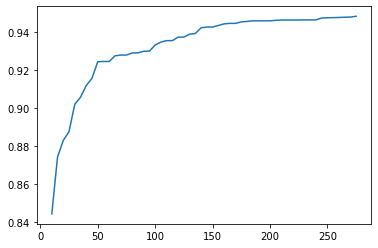

In [25]:
poly = PolynomialFeatures()
X_train_transformed_poly = poly.fit_transform(X_train)
X_test_transformed_poly = poly.transform(X_test)

print(X_train_transformed_poly.shape)

no_of_features = []
r_squared = []

for k in range(10, 277, 5):
    selector = SelectKBest(f_regression, k = k)
    X_train_transformed = selector.fit_transform(X_train_transformed_poly, y_train)
    regressor = LinearRegression()
    regressor.fit(X_train_transformed, y_train)
    no_of_features.append(k)
    r_squared.append(regressor.score(X_train_transformed, y_train))
    
sns.lineplot(x = no_of_features, y = r_squared)

In [26]:
selector = SelectKBest(f_regression, k = 170)
X_train_transformed = selector.fit_transform(X_train_transformed_poly, y_train)
X_test_transformed = selector.transform(X_test_transformed_poly)

In [27]:
models_with_grids_poly = [
    ("Linear Regression polynomial", LinearRegression(), {}),
    ("Ridge Regression polynomial", Ridge(), {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}),
    ("Lasso Regression polynomial", Lasso(), {'alpha': [0.01, 0.1, 1.0, 10.0]}),
    ("ElasticNet polynomial", ElasticNet(), {'alpha': [0.01, 0.1, 1.0], 'l1_ratio': [0.1, 0.5, 0.9]}),
    ("Decision Tree polynomial", DecisionTreeRegressor(), {'max_depth': [3, 5, 10, None]}),
    ("Random Forest polynomial", RandomForestRegressor(random_state=42), {'n_estimators': [50, 100, 150], 'max_depth': [10, 20, None]}),
    ("Gradient Boosting polynomial", GradientBoostingRegressor(random_state=42), {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}),
    ("Support Vector Regressor polynomial", SVR(), {'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 1]}),
    ("K-Nearest Neighbors polynomial", KNeighborsRegressor(), {'n_neighbors': [3, 5, 10]})
]
results3 = []

for name, model, param_grid in models_with_grids_poly:
    print(f"Optimizing {name}...")
    
    # Perform Grid Search
    if param_grid:  # If there are parameters to tune
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
        grid_search.fit(X_train_transformed, y_train)
        best_model = grid_search.best_estimator_
    else:
        best_model = model
        best_model.fit(X_train_transformed, y_train)

    # Train and Test
    y_pred_train = best_model.predict(X_train_transformed)
    y_pred_test = best_model.predict(X_test_transformed)
    
    # Metrics
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    #pearson_corr, _ = pearsonr(y_test, y_pred_test)
    spearman_corr, _ = spearmanr(y_test, y_pred_test)
    
    # Store results
    results3.append({
        "Model": name,
        "Best Parameters": grid_search.best_params_ if param_grid else "Default",
        "MSE (Train)": mse_train,
        "MSE (Test)": mse_test,
        "RMSE (Train)": rmse_train,
        "RMSE (Test)": rmse_test,
        "R² (Train)": r2_train * 100,
        "R² (Test)": r2_test * 100,
        #"Pearson Correlation": pearson_corr * 100,
        "Spearman Correlation": spearman_corr * 100
    })

Optimizing Linear Regression polynomial...
Optimizing Ridge Regression polynomial...
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  25 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Optimizing Lasso Regression polynomial...
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Optimizing ElasticNet polynomial...
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    3.8s finished


Optimizing Decision Tree polynomial...
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.4s finished


Optimizing Random Forest polynomial...
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  4.3min finished


Optimizing Gradient Boosting polynomial...
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.8min finished


Optimizing Support Vector Regressor polynomial...
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  2.1min finished


Optimizing K-Nearest Neighbors polynomial...
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   18.8s finished


In [28]:
results3_df = pd.DataFrame(results3)

In [29]:
results3_df

,Model,Best Parameters,MSE (Train),MSE (Test),RMSE (Train),RMSE (Test),R² (Train),R² (Test),Spearman Correlation
0,Linear Regression polynomial,Default,0.055429,0.143164,0.235433,0.378370,94.442138,85.798636,96.342282
1,Ridge Regression polynomial,{'alpha': 10.0},0.056203,0.093866,0.237072,0.306376,94.364469,90.688813,96.312642
2,Lasso Regression polynomial,{'alpha': 0.01},0.072263,0.103133,0.268818,0.321144,92.754101,89.769553,95.992146
3,ElasticNet polynomial,"{'alpha': 0.01, 'l1_ratio': 0.1}",0.060913,0.092592,0.246805,0.304290,93.892248,90.815189,96.126476
4,Decision Tree polynomial,{'max_depth': 10},0.028790,0.062428,0.169675,0.249856,97.113247,93.807371,96.625570
5,Random Forest polynomial,"{'max_depth': 20, 'n_estimators': 150}",0.006737,0.043702,0.082080,0.209051,99.324465,95.664880,97.912546
6,Gradient Boosting polynomial,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.024992,0.039067,0.158088,0.197654,97.494046,96.124680,97.900784
7,Support Vector Regressor polynomial,"{'C': 10, 'epsilon': 0.01}",0.042670,0.068413,0.206566,0.261559,95.721495,93.213666,97.022340
8,K-Nearest Neighbors polynomial,{'n_neighbors': 3},0.025818,0.064593,0.160679,0.254151,97.411231,93.592634,97.385351


In [30]:
row_from_df2 = results2_df.iloc[[4]]
row_from_df3 = results3_df.iloc[[0,1,2,3,4,5,6,7,8]]
combined = pd.concat([row_from_df2, row_from_df3], ignore_index=True)
combined_df = pd.DataFrame(combined)

In [31]:
combined_df

,Model,Best Parameters,MSE (Train),MSE (Test),RMSE (Train),RMSE (Test),R² (Train),R² (Test),Spearman Correlation
0,Decision Tree,{'max_depth': 10},0.036113,0.077592,0.190033,0.278553,96.378963,92.303162,96.070470
1,Linear Regression polynomial,Default,0.055429,0.143164,0.235433,0.378370,94.442138,85.798636,96.342282
2,Ridge Regression polynomial,{'alpha': 10.0},0.056203,0.093866,0.237072,0.306376,94.364469,90.688813,96.312642
3,Lasso Regression polynomial,{'alpha': 0.01},0.072263,0.103133,0.268818,0.321144,92.754101,89.769553,95.992146
4,ElasticNet polynomial,"{'alpha': 0.01, 'l1_ratio': 0.1}",0.060913,0.092592,0.246805,0.304290,93.892248,90.815189,96.126476
5,Decision Tree polynomial,{'max_depth': 10},0.028790,0.062428,0.169675,0.249856,97.113247,93.807371,96.625570
6,Random Forest polynomial,"{'max_depth': 20, 'n_estimators': 150}",0.006737,0.043702,0.082080,0.209051,99.324465,95.664880,97.912546
7,Gradient Boosting polynomial,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.024992,0.039067,0.158088,0.197654,97.494046,96.124680,97.900784
8,Support Vector Regressor polynomial,"{'C': 10, 'epsilon': 0.01}",0.042670,0.068413,0.206566,0.261559,95.721495,93.213666,97.022340
9,K-Nearest Neighbors polynomial,{'n_neighbors': 3},0.025818,0.064593,0.160679,0.254151,97.411231,93.592634,97.385351


# References:
1. https://medium.com/@mayankshah1607/machine-learning-feature-selection-with-backward-elimination-955894654026